In [72]:
# Analysis testing

import glob
import numpy as np

results_files = glob.glob('../npy/test002*.npy')
results_files

['../npy/test002_ particles_exp_-2_-2_-2_iters_8.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_5.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_13.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_7.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_14.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_9.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_3.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_0.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_6.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_12.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_4.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_1.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_11.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_15.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_2.npy',
 '../npy/test002_ particles_exp_-2_-2_-2_iters_10.npy']

In [74]:
def id2vars(bulbID):
    splitID = bulbID.split('_')
    expname = str(splitID[0].split('/')[2])
    Va = float(splitID[3])
    Vb = float(splitID[4])
    Vc = float(splitID[5])
    iters = float(splitID[7].split('.')[0])
    return (Va,Vb,Vc,iters,expname)

import pandas as pd 

df = []
for file in sorted(results_files):
#     print('bulb ID vars:')
#     print(id2vars(file))
    data = np.load(file)
#     print('data shape:')
#     print(data.shape)
#     print('time and space averaged mean/std in x y z')
    data = pd.DataFrame(np.reshape(np.nanmean(data,axis=(0,1)),(10,3)))
    data.columns = ['x','y','z']
    data.index = ['Idp_m','Idp_s','Rhop_m','Rhop_s','Press_m','Press_s','Vel_m','Vel_s','Vor_m','Vor_s']
    vel_m = data.iloc[7]
    reynoldstress = [vel_m[0]*vel_m[1],vel_m[0]*vel_m[2],vel_m[1]*vel_m[2]]
    vor = list(data.iloc[8])+[id2vars(file)[3]] + reynoldstress
    df.append(vor)  
#     break
    #     display(data)
#     print((np.nanmean(data,axis=(0,1))))
print('Vorticity')
df = pd.DataFrame(df)
df.columns = ['x','y','z','iters','\tau_{ij}','\tau_{ik}','\tau_{jk}']
df

Vorticity


x         y         z  iters  \tau_{ij}  \tau_{ik}  \tau_{jk}
0   0.402517  1.003651  0.638659    0.0   0.002031   0.005112   0.001628
1   0.397090  0.984822  0.616416    1.0   0.001914   0.004902   0.001565
2   0.397145  0.994270  0.621520   10.0   0.001969   0.005026   0.001586
3   0.401131  0.994314  0.621198   11.0   0.001968   0.005025   0.001594
4   0.399104  0.991955  0.620189   12.0   0.001961   0.005011   0.001589
5   0.397619  0.989390  0.614817   13.0   0.001933   0.004943   0.001587
6   0.396972  0.990637  0.620701   14.0   0.001951   0.004985   0.001580
7   0.395871  0.992004  0.616501   15.0   0.001938   0.004984   0.001576
8   0.397321  0.987259  0.617512    2.0   0.001935   0.004966   0.001568
9   0.396644  0.986654  0.615912    3.0   0.001935   0.004948   0.001578
10  0.397214  0.987922  0.617756    4.0   0.001939   0.004978   0.001580
11  0.395703  0.990339  0.618163    5.0   0.001938   0.004968   0.001578
12  0.395839  0.993542  0.617409    6.0   0.001929   0.004960   0.001576
13  0.400161  0.992855  0.620910    7.0   0.001956   0.005000   0.001582
14  0.399387  0.995713  0.620637    8.0   0.001968   0.005044   0.001594
15  0.396435  0.993492  0.619928    9.0   0.001953   0.005024   0.001573

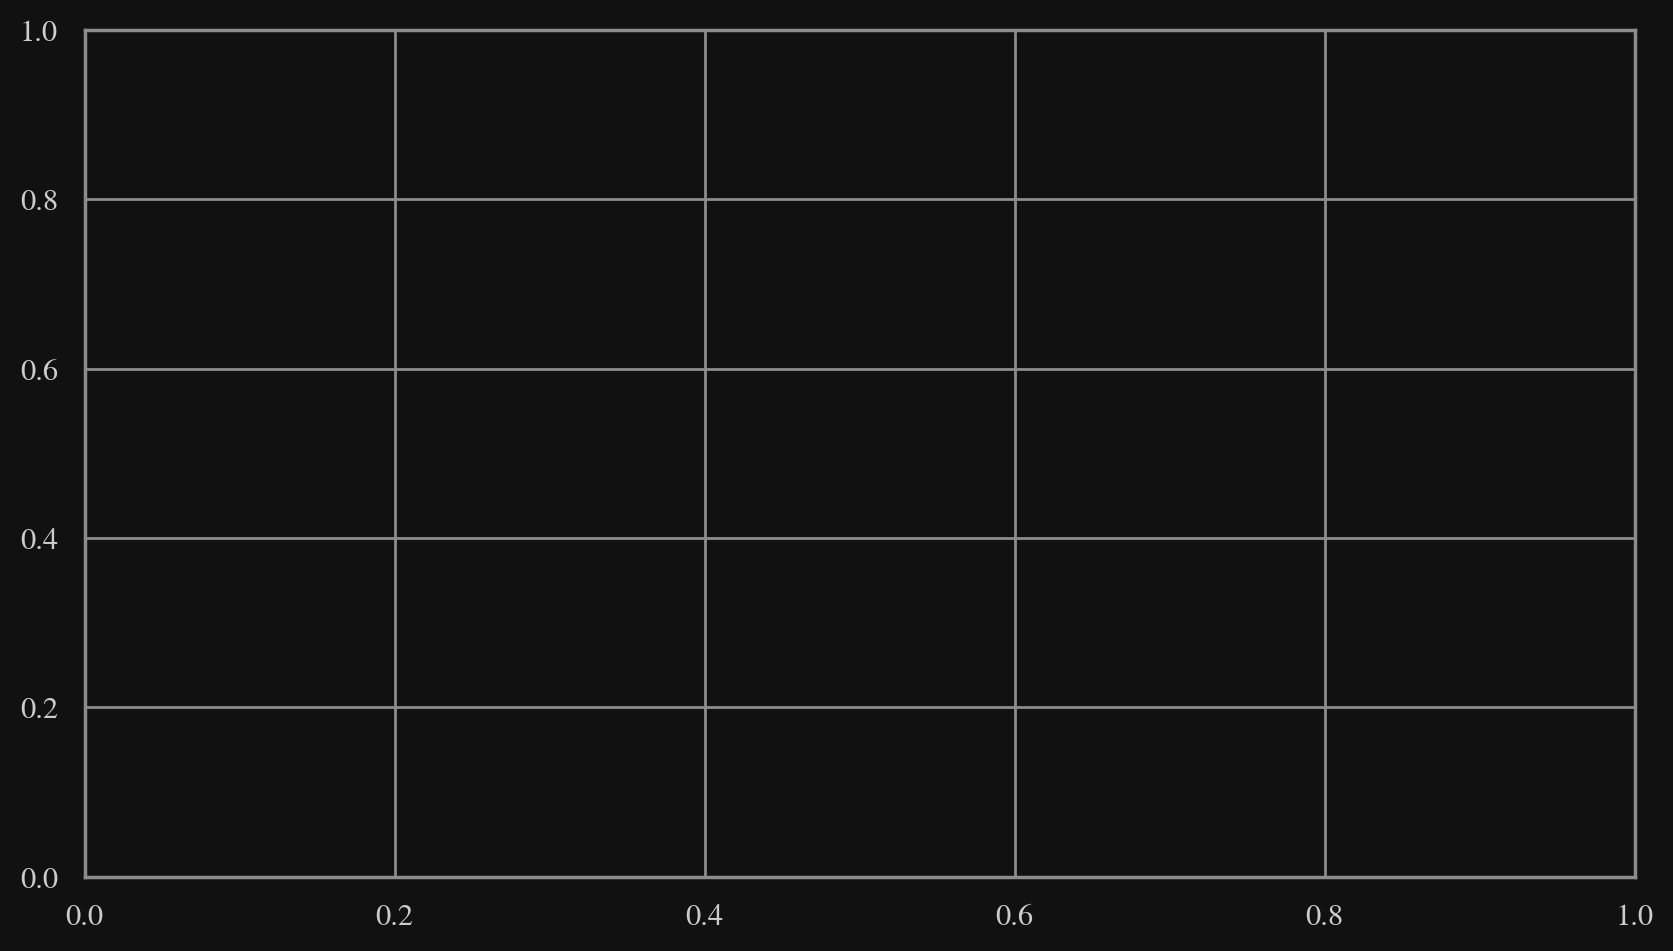

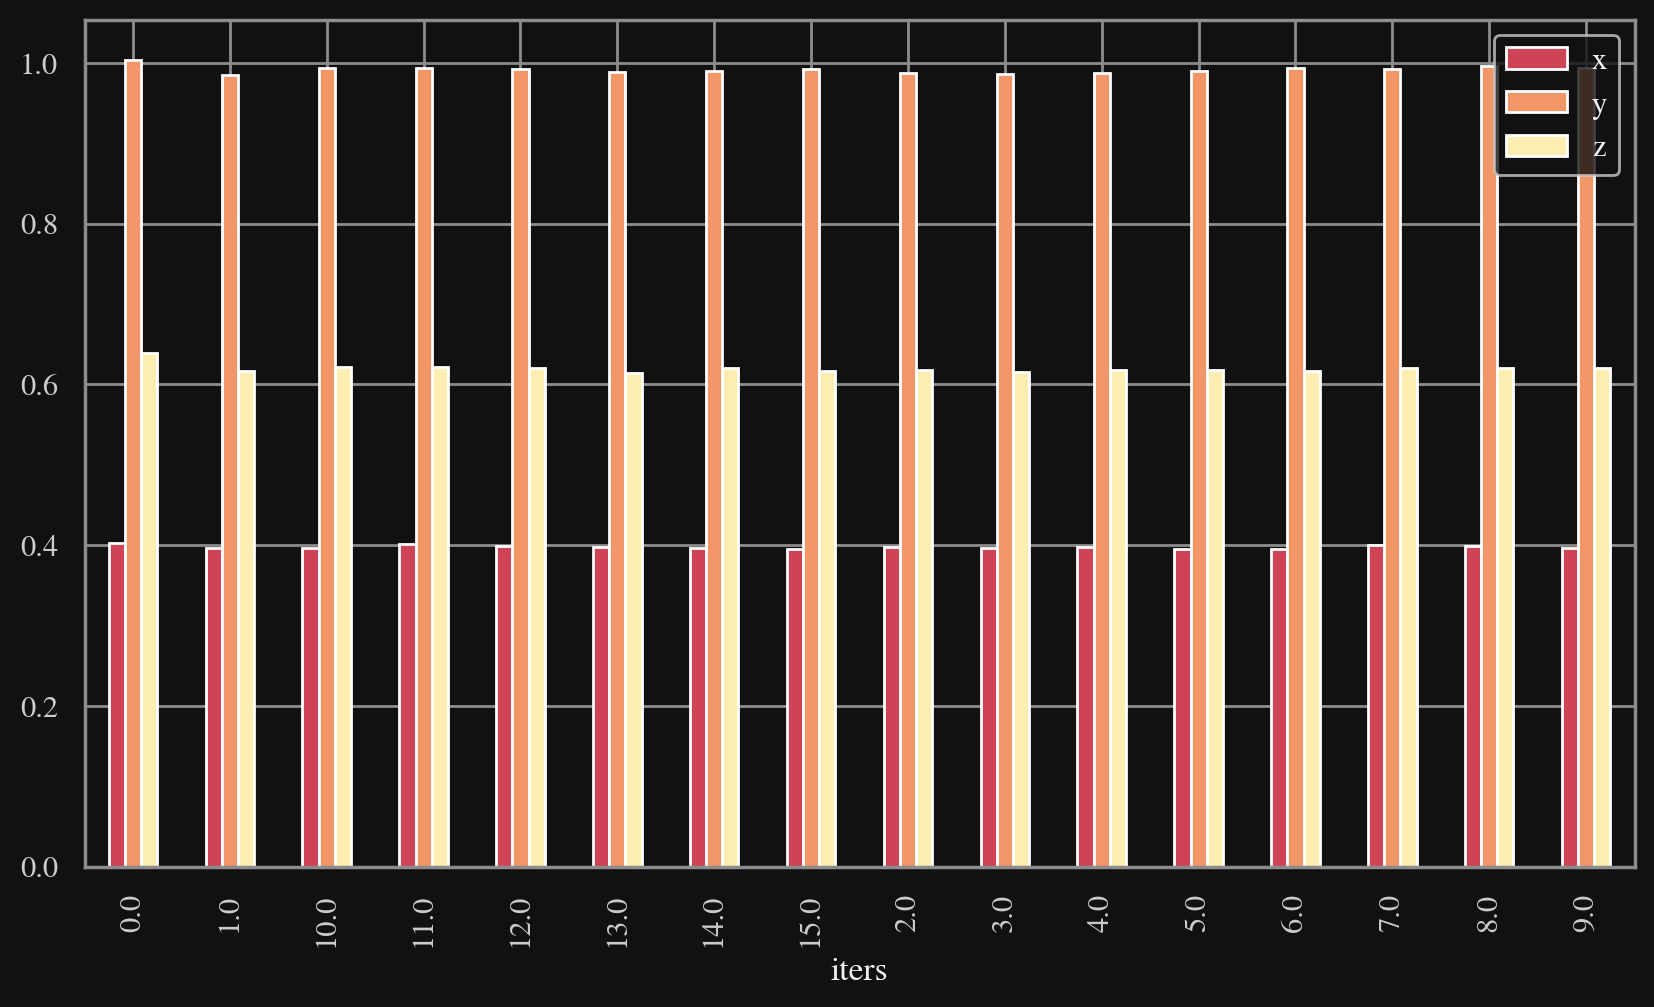

Glyph 9 missing from current font.
Glyph 9 missing from current font.


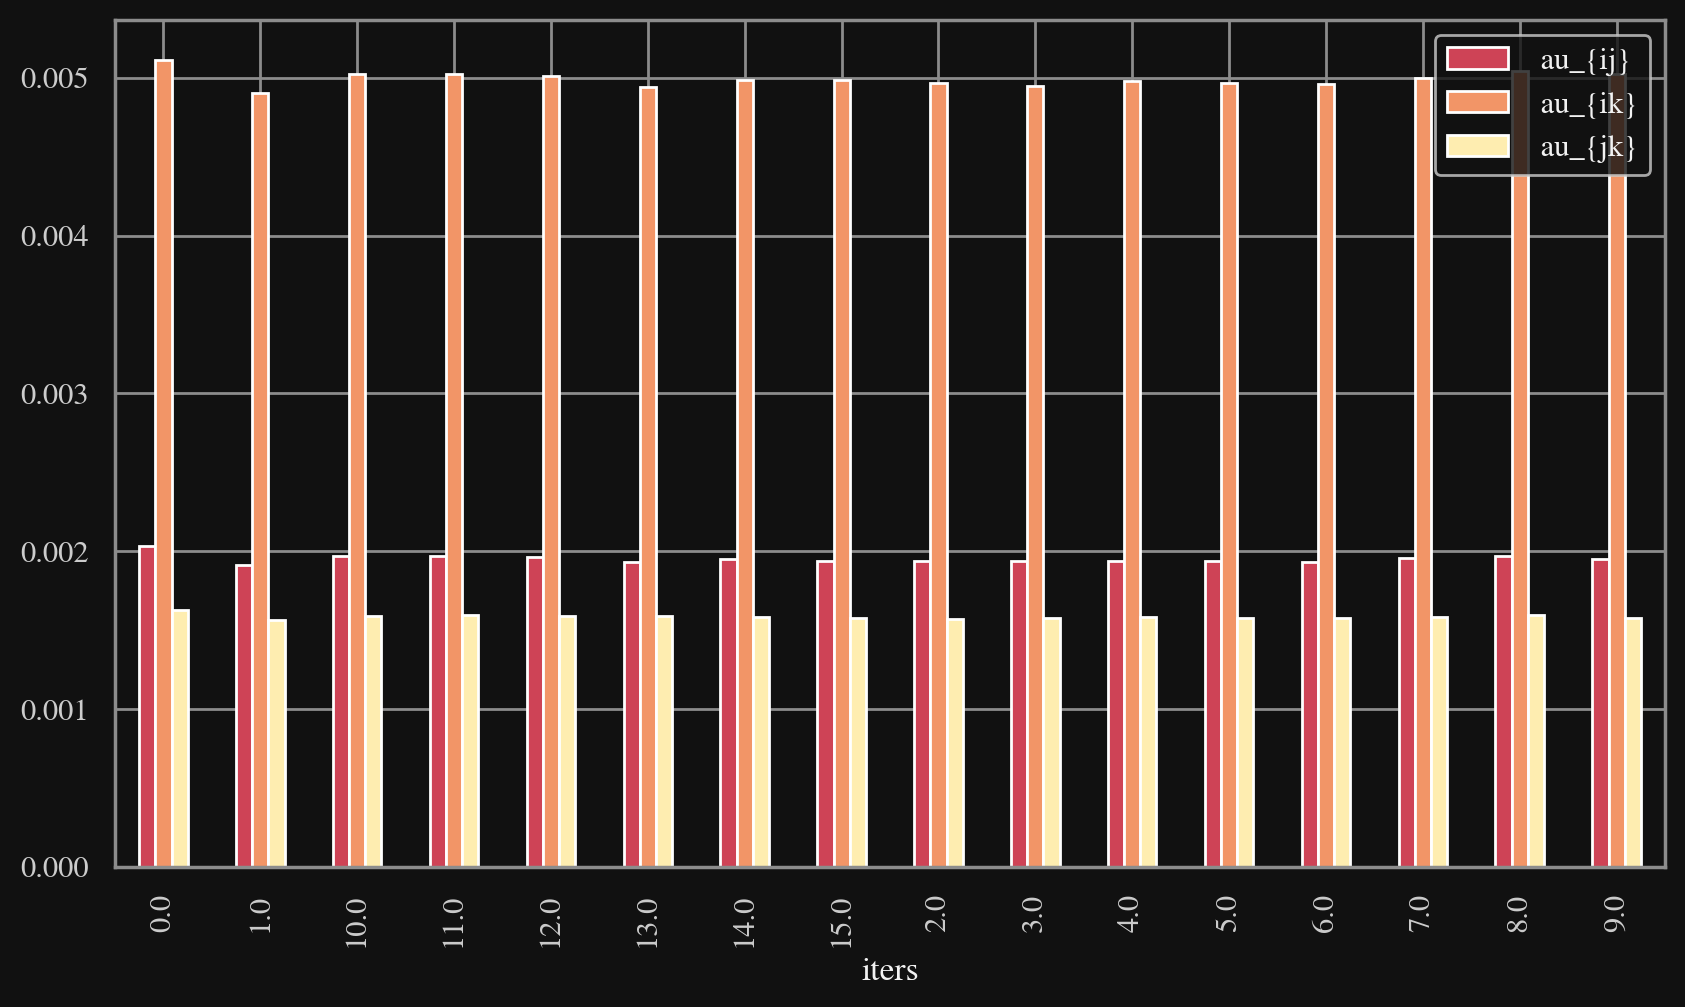

In [84]:
from jb4jupyter import *
colabprettyplot('d',lines=3)
df.plot(kind='bar',x='iters',y=['x','y','z'])
df.plot(kind='bar',x='iters',y=['\tau_{ij}','\tau_{ik}','\tau_{jk}'])
plt.show()

In [50]:
part_files =glob.glob('../*/particles/*.vtk')
part_files

['../Temp_Case_out/particles/PartFluid_0002.vtk',
 '../Temp_Case_out/particles/PartFluid_0001.vtk',
 '../Temp_Case_out/particles/PartFluid_0000.vtk']

In [67]:
import pyvista as pv

for file in part_files:
    mesh = pv.read(file)
    display(mesh)
    bound = [-1,0,-1,0,-1,0]
    clipped = mesh.clip_box(bound,invert=False)
#     print('hereeee')
#     print(clipped)
    display(clipped)
#     print(np.nanmean(abs(clipped['Vel']),axis=0))
#     print(np.nanmean(abs(clipped['Press'])))
    break

PolyData (0x7f272c77afa0)
  N Cells:	6843
  N Points:	6843
  X Bounds:	-1.050e+00, 1.047e+00
  Y Bounds:	-9.146e-01, 9.146e-01
  Z Bounds:	-9.256e-01, 9.936e-01
  N Arrays:	6

UnstructuredGrid (0x7f272c7282f0)
  N Cells:	803
  N Points:	803
  X Bounds:	-9.989e-01, -2.592e-05
  Y Bounds:	-9.146e-01, -6.778e-09
  Z Bounds:	-9.256e-01, -6.393e-05
  N Arrays:	6

In [27]:
class TestClass:
    """This will actuall be helpful, this is helpful"""
    def __init__(self, fullname, birthday):
        self.name = fullname
        self.birthday = birthday 
    def another(self):
        """this is called a doc string"""
        return 100

In [26]:
user = TestClass("name",'birth')
print(user.name,user.birthday)

name birth


In [21]:
user1.first = 'dave'
user1.last = 'name'